In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [23]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
data = pd.read_csv(
    'AirPassengers.csv', parse_dates=['Month'],
    index_col='Month', date_parser=dateparse
)
data.head()

C:\Users\glauc\AppData\Local\Temp\ipykernel_5456\180487480.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv(


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [24]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

## Série Temporal

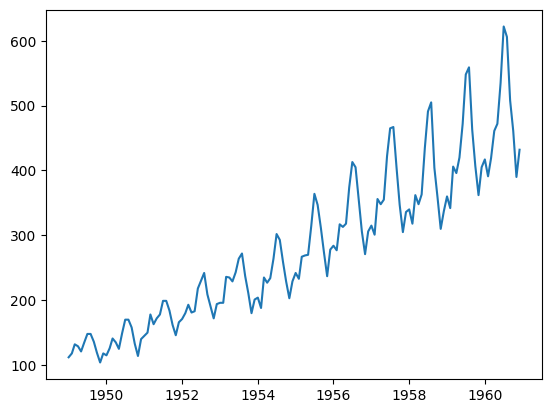

In [25]:
ts = data['#Passengers']
plt.plot(ts)

## Decomposição de Série Temporal

In [26]:
decomposicao = seasonal_decompose(ts)

In [27]:
tendencia = decomposicao.trend
tendencia

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: trend, Length: 144, dtype: float64

In [28]:
sazionalidade = decomposicao.seasonal
sazionalidade

Month
1949-01-01   -24.748737
1949-02-01   -36.188131
1949-03-01    -2.241162
1949-04-01    -8.036616
1949-05-01    -4.506313
                ...    
1960-08-01    62.823232
1960-09-01    16.520202
1960-10-01   -20.642677
1960-11-01   -53.593434
1960-12-01   -28.619949
Name: seasonal, Length: 144, dtype: float64

In [29]:
aleatoriedade = decomposicao.resid
aleatoriedade

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

## Visualização gráfica

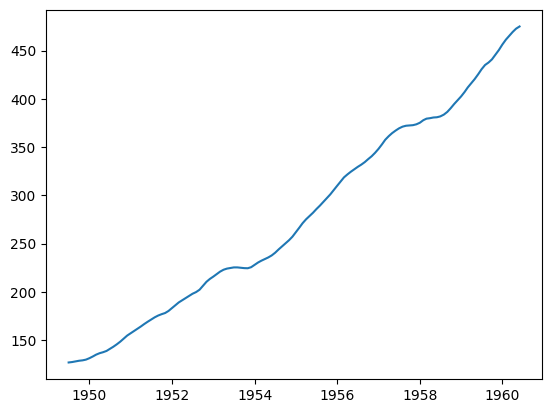

In [30]:
plt.plot(tendencia)

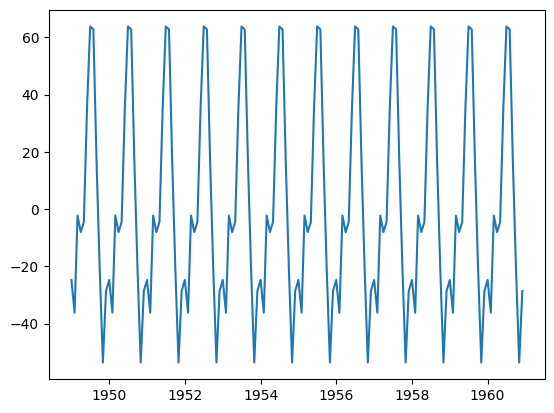

In [31]:
plt.plot(sazionalidade)

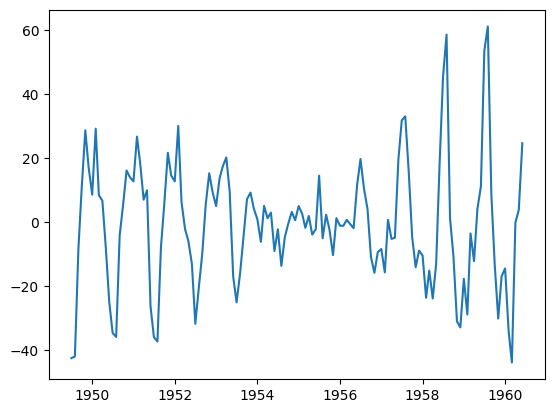

In [32]:
plt.plot(aleatoriedade)

- loc= 'best' -> Melhor posição para legenda (automatico)

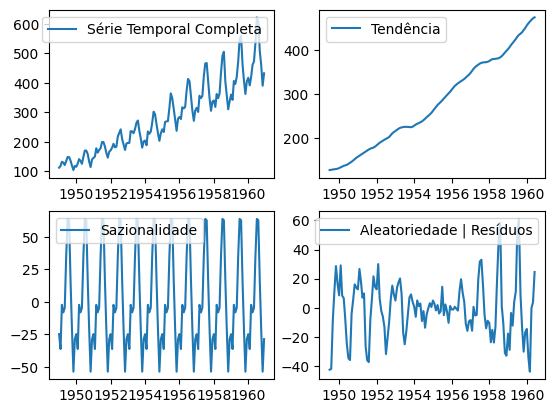

In [33]:
plt.subplot(2, 2, 1)
plt.plot(ts, label='Série Temporal Completa')
plt.legend(loc='best')

plt.subplot(2, 2, 2)
plt.plot(tendencia, label='Tendência')
plt.legend(loc='best')

plt.subplot(2, 2, 3)
plt.plot(sazionalidade, label='Sazionalidade')
plt.legend(loc='best')

plt.subplot(2, 2, 4)
plt.plot(aleatoriedade, label='Aleatoriedade | Resíduos')
plt.legend(loc='best')